## Auteur: Abdelfattah Aboueloualim
### Email: abouelaoualim.a@sfeir.com

Les DAGs proposés par les services tels que **Cloud Composer** (Airflow) pour traiter des pipelines de Data Engineering, sont très efficaces pour simplifier et automatiser les traitements sur les données massives.

Ici, faute de temps, je vous propose de voir ce **Notebook** comme un **DAG**, puisque ces cellules ne forme pas de cycle!

Dans ce **DAG** (*Notebook*), on importe une libraire que j'ai codé dans le fichier **servier.py**. Les méthodes de cette librairie et leurs ouput peuvent être réutilisés facilement dans d'autres **DAG**. 

#### Importation de la librairie servier

In [1]:
import servier
%matplotlib inline

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
!ls

clinical_trials.csv  pubmed.csv   servier.py	      Untitled.ipynb
drugs.csv	     pubmed.json  test_python_de.pdf
output.json	     __pycache__  Untitled1.ipynb


#### Création des Dataframes à partir des fichiers csv

N.B.: Je n'ai pas eu besoin d'utiliser le fichier **pubmed.json**

In [3]:
df_clinical = servier.get_df("clinical_trials.csv")

In [4]:
df_drugs = servier.get_df("drugs.csv")

In [5]:
df_pubmed = servier.get_df("pubmed.csv")

#### Traitement du texte des colonnes *title* et *journal* et formatage des colonnes *date*

In [6]:
df_clinical = servier.df_preprocessing(df_clinical)

In [7]:
df_pubmed = servier.df_preprocessing(df_pubmed)

#### Détection des *drugs* mentionnés dans les *titles* et ajout d'une colonne *drug*

In [8]:
df_clinical = servier.add_drugs(df_clinical, df_drugs)

In [9]:
df_clinical

,id,scientific_title,date,journal,title_set,drug
0,NCT01967433,Use of Diphenhydramine as an Adjunctive Sedati...,01/01/20,Journal emergency nursing,"{diphenhydramine, colonoscopy, adjunctive, opi...",diphenhydramine
1,NCT04189588,Phase 2 Study IV QUZYTTIR™ (Cetirizine Hydroch...,01/01/20,Journal emergency nursing,"{diphenhydramine, iv, hydrochloride, phase, st...",diphenhydramine
2,NCT04237091,Feasibility of a Randomized Controlled Clinica...,01/01/20,Journal emergency nursing,"{paclitaxel, diphenhydramine, reactions, compa...",diphenhydramine
3,NCT04153396,Preemptive Infiltration With Betamethasone and...,01/01/20,Hôpitaux Universitaires Genève,"{ropivacaine, betamethasone, infiltration, lam...",betamethasone
4,NCT04188184,Tranexamic Acid Versus Epinephrine During Expl...,27/04/20,Journal emergency nursing,"{tranexamic, tympanotomy, versus, exploratory,...",epinephrine


In [10]:
df_pubmed = servier.add_drugs(df_pubmed, df_drugs)

In [11]:
df_pubmed

,id,title,date,journal,title_set,drug
0,1,A 44-year-old man with erythema of the face di...,01/01/19,Journal emergency nursing,"{palpitations, diphenhydramine, chest, erythem...",diphenhydramine
1,2,"An evaluation of benadryl, pyribenzamine, and ...",01/01/19,Journal emergency nursing,"{diphenhydramine, evaluation, antihistaminic, ...",diphenhydramine
2,3,Diphenhydramine hydrochloride helps symptoms o...,01/02/19,The Journal pediatrics,"{fish, diphenhydramine, poisoning, hydrochlori...",diphenhydramine
3,4,Tetracycline Resistance Patterns of Lactobacil...,01/01/20,Journal food protection,"{resistance, lactobacillus, tetracycline, grou...",tetracycline
4,5,Appositional Tetracycline bone formation rates...,01/02/20,American journal veterinary research,"{rates, tetracycline, beagle, appositional, fo...",tetracycline
5,6,Rapid reacquisition of contextual fear followi...,01/01/20,Psychopharmacology,"{fear, rapid, following, tetracycline, ethanol...",tetracycline
6,7,The High Cost of Epinephrine Autoinjectors and...,02/01/20,The journal allergy clinical immunology practice,"{alternatives, cost, epinephrine, possible, hi...",epinephrine
7,8,Time to epinephrine treatment is associated wi...,03/01/20,The journal allergy clinical immunology practice,"{achieve, risk, cardiac, arrest, epinephrine, ...",epinephrine


#### Création du graphe de liaison entre: *journal*, *pubmed*, *clinical_trial* et *drug* 

In [12]:
G = servier.build_digraph(df_pubmed, df_clinical)

In [13]:
servier.info_graph(G)

DiGraph with 17 nodes and 14 edges


#### Affichage du graphe

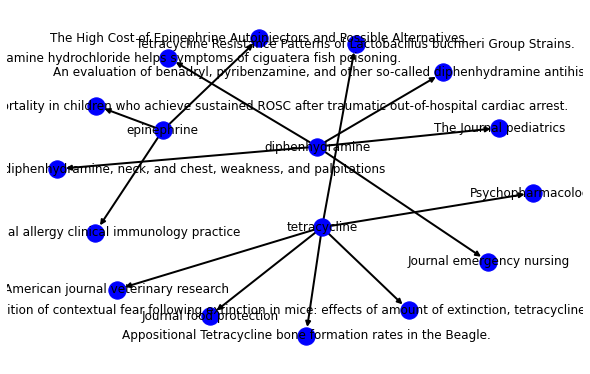

In [14]:
servier.draw_graph(G)

#### Affichage de l'output

In [15]:
servier.output(G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'name': 'drug', 'id': 'diphenhydramine'},
  {'name': 'journal', 'id': 'Journal emergency nursing'},
  {'name': 'pubmed',
   'id': 'A 44-year-old man with erythema of the face diphenhydramine, neck, and chest, weakness, and palpitations'},
  {'name': 'pubmed',
   'id': 'An evaluation of benadryl, pyribenzamine, and other so-called diphenhydramine antihistaminic drugs in the treatment of allergy.'},
  {'name': 'journal', 'id': 'The Journal pediatrics'},
  {'name': 'pubmed',
   'id': 'Diphenhydramine hydrochloride helps symptoms of ciguatera fish poisoning.'},
  {'name': 'drug', 'id': 'tetracycline'},
  {'name': 'journal', 'id': 'Journal food protection'},
  {'name': 'pubmed',
   'id': 'Tetracycline Resistance Patterns of Lactobacillus buchneri Group Strains.'},
  {'name': 'journal', 'id': 'American journal veterinary research'},
  {'name': 'pubmed',
   'id': 'Appositional Tetracycline bone formation rates in the Beagle.'}

#### Sauvegarde du *output* dans un fichier json *output.json*

In [16]:
servier.save_json(G)

In [17]:
!ls

clinical_trials.csv  pubmed.csv   servier.py	      Untitled.ipynb
drugs.csv	     pubmed.json  test_python_de.pdf
output.json	     __pycache__  Untitled1.ipynb


### Affichage des noeuds qui ont le degré maximal
#### Le médicament le plus cité

In [18]:
servier.max_degree_drug(G)

'tetracycline'

#### Le journal qui a cité le plus de médicament

In [19]:
servier.max_degree_journal(G)

'Journal emergency nursing'

#### La publication qui a cité le plus de médicament

In [20]:
servier.max_degree_pubmed(G)

'A 44-year-old man with erythema of the face diphenhydramine, neck, and chest, weakness, and palpitations'

#### Le noeud qui a le degré maximum: c'est un médicament

In [21]:
servier.max_degree_graph(G)

'tetracycline'

#### Conclusion
Il est courant dans les domaines de la biologie, pharmaceutique et les publications scientifiques, que les données soient connectées. Cela peut être modélisé mathématiquement par un graphe (**théorie des graphes**). Et techniquement on parle de réseau ou de Graphe Data Base. L'avantage de travailler avec la théorie des graphes (très mal connu malheureusement) est de pouvoir bénéficier de décennies de traveaux de recherche mathématiques dans ce domaines (voir par exemple: Alhajj, Reda and Jon Rokne (2018). “Encyclopedia of Social Network Analysis and Mining”. In: Springer.) et plus récemment pouvoir faire du **Machine Learning** sur les graphes (**Graph Convolutional Networks**) (voir par exemple: William L. Hamilton, Rex Ying and Jure Leskovec (2017). “Inductive Representation Learning on Large Graphs.” In: NIPS.).

Google a ajouté à son moteur de recherche le **Knowledge Graph** et des entreprises tels que **Neo4j** propose des **Graph Data Base** qui peuvent bénéficier des avancées du cloud pour traiter des grandes masses de données (voir par exemple: https://neo4j.com/cloud/aura-google-cloud/). En effet, par exemple avec **Neo4j Aura** on peut faire de la data science sur une **Graph Data Base** sur *Google Cloud* et donc bénéficier de la *stack* technologique de GCP tel que **Cloud Composer** et **Dataflow** pour faire des pipelines qui traitent des données massives!